<a href="https://colab.research.google.com/github/Tako-San/CompMath/blob/main/1_task/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашняя работа №1 по вычислительной математике.


Включаем все необходимые библиотеки

In [262]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

Определяем класс Method, который хранит функции погрешности метода и абсолютной погрешности

In [263]:
class Method:
  # ctor
  def __init__(self, method_err, round_err):
    self.__method_err = method_err
    self.__round_err = round_err
    self.__abs_err = method_err + round_err
  
  # calculating absolute error in concrete value with concrete step
  def calc_abs_err(self, func, hval, xval):
    concrete_mr = sp.N(self.__method_err.subs([(f, func), (x, xval), (h, hval)]).doit())
    concrete_rr = sp.N(self.__round_err.subs([(f, func), (x, xval), (h, hval)]).doit())
    return float((concrete_mr + concrete_rr).evalf())
  
  # appending to plot
  def plot_abs(self, func, xval):
    n_arr = np.arange(1, 21)
    h_arr = 2 / 2**n_arr

    delta_arr = [self.calc_abs_err(func, hval, xval) for hval in h_arr]
    delta_log2_arr = [np.log2(abs(delta)) for delta in delta_arr]

    plt.plot(np.log2(h_arr), delta_log2_arr)
    plt.xlabel("log2(h)")
    plt.ylabel("log2(delta)")

    


In [264]:
# init constants
h, x = sp.symbols('h x')
f = sp.Function('f')(x)

# create methods
m1 = Method(f.diff((x, 2)) * h / 2, 2 * np.finfo(float).eps / h)
m2 = Method(-f.diff((x, 2)) * h / 2, 2 * np.finfo(float).eps / h)
m3 = Method(f.diff((x, 3)) * h**2 / 6, np.finfo(float).eps / h)



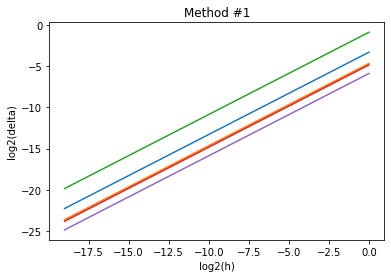

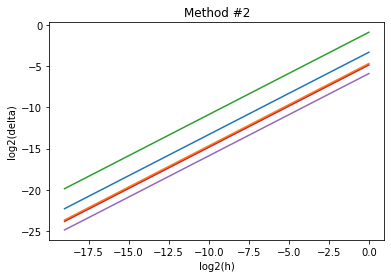

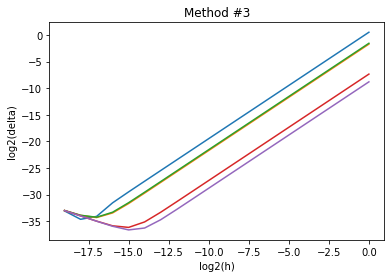

In [267]:
method_arr = [m1, m2, m3]
func_arr = [sp.sin(x**2), sp.cos(sp.sin(x)), sp.exp(sp.sin(sp.cos(x))), sp.ln(x + 3), (x + 3)**0.5]

for idx in range(len(method_arr)):
  for func in func_arr:
    method_arr[idx].plot_abs(func, np.pi / 4)
  plt.title('Method #' + str(idx + 1))
  plt.show()